In [2154]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


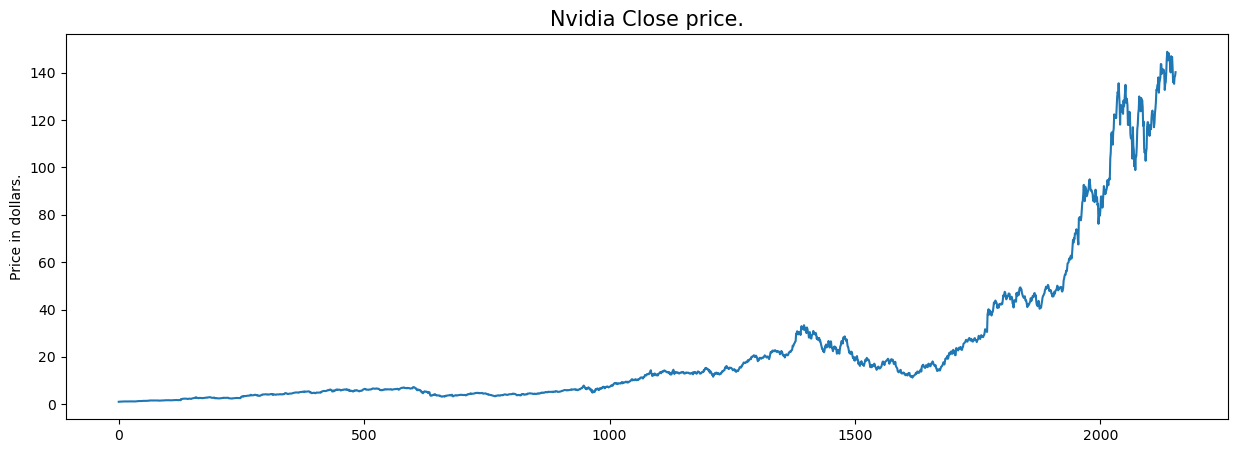

In [2155]:
data = pd.read_csv('nvda.csv')
df = data
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('Nvidia Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [2156]:
data = df[df.columns[4:10]]
data.head()

,Adj Close,Close,High,Low,Open,Volume
0,1.003593,1.02450,1.02500,0.97500,0.97975,2110256000
1,1.033226,1.05475,1.07000,1.01350,1.01675,973032000
2,1.035430,1.05700,1.06450,1.03650,1.05000,628392000
3,1.061879,1.08400,1.09625,1.05000,1.05000,541072000
4,1.066532,1.08875,1.09650,1.07825,1.07975,398880000


In [2157]:
data=data.drop(['Adj Close'], axis=1)
data.head()

,Close,High,Low,Open,Volume
0,1.02450,1.02500,0.97500,0.97975,2110256000
1,1.05475,1.07000,1.01350,1.01675,973032000
2,1.05700,1.06450,1.03650,1.05000,628392000
3,1.08400,1.09625,1.05000,1.05000,541072000
4,1.08875,1.09650,1.07825,1.07975,398880000


In [2158]:
data.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

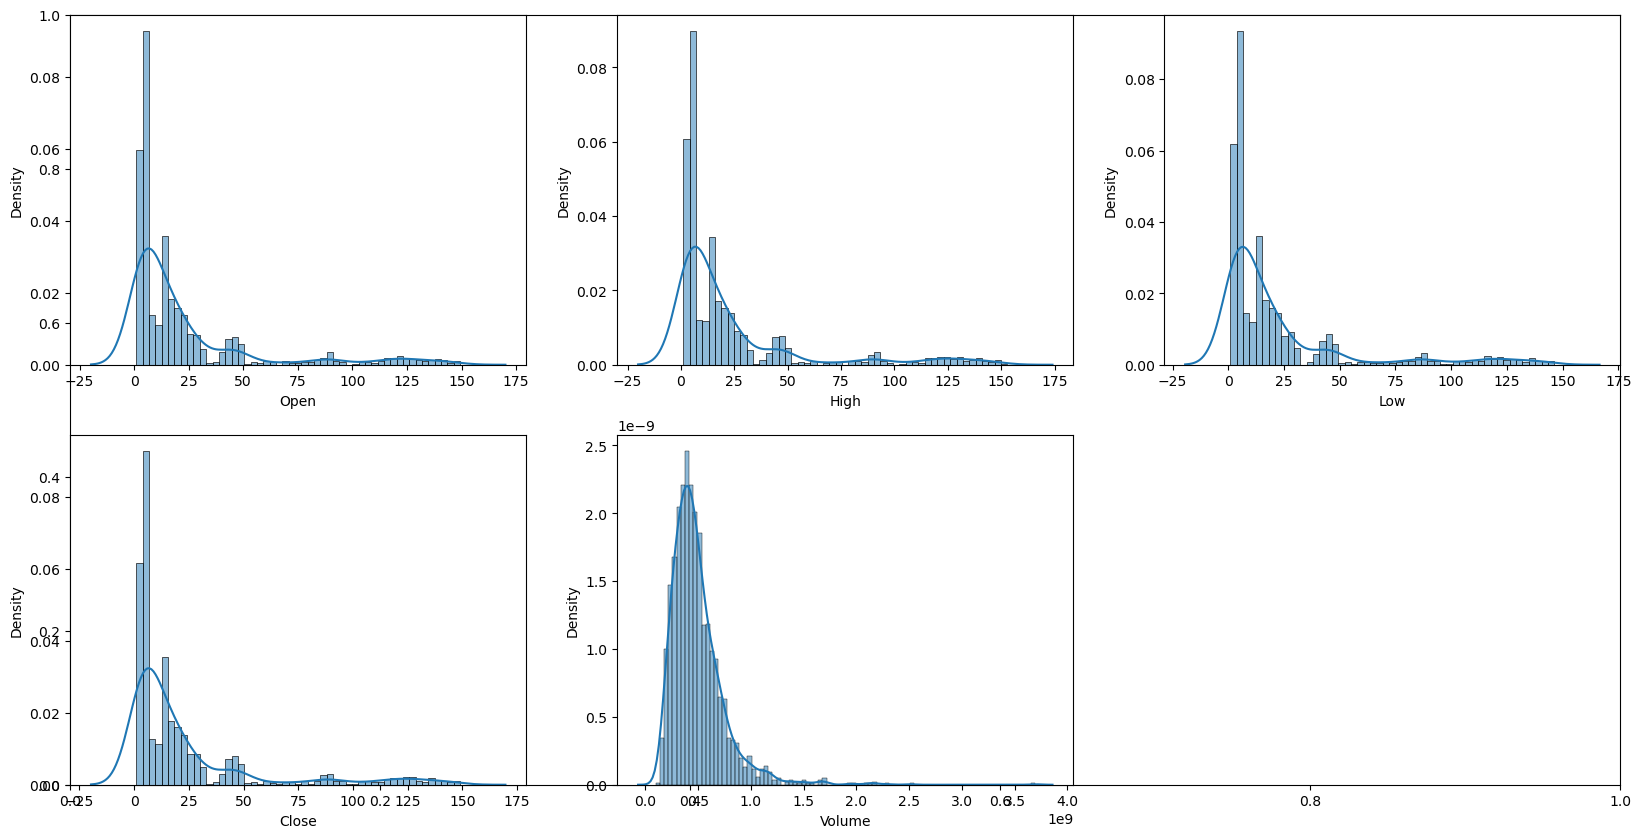

In [2159]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.histplot(data[col],kde=True, kde_kws=dict(cut=3),stat='density')
plt.show()

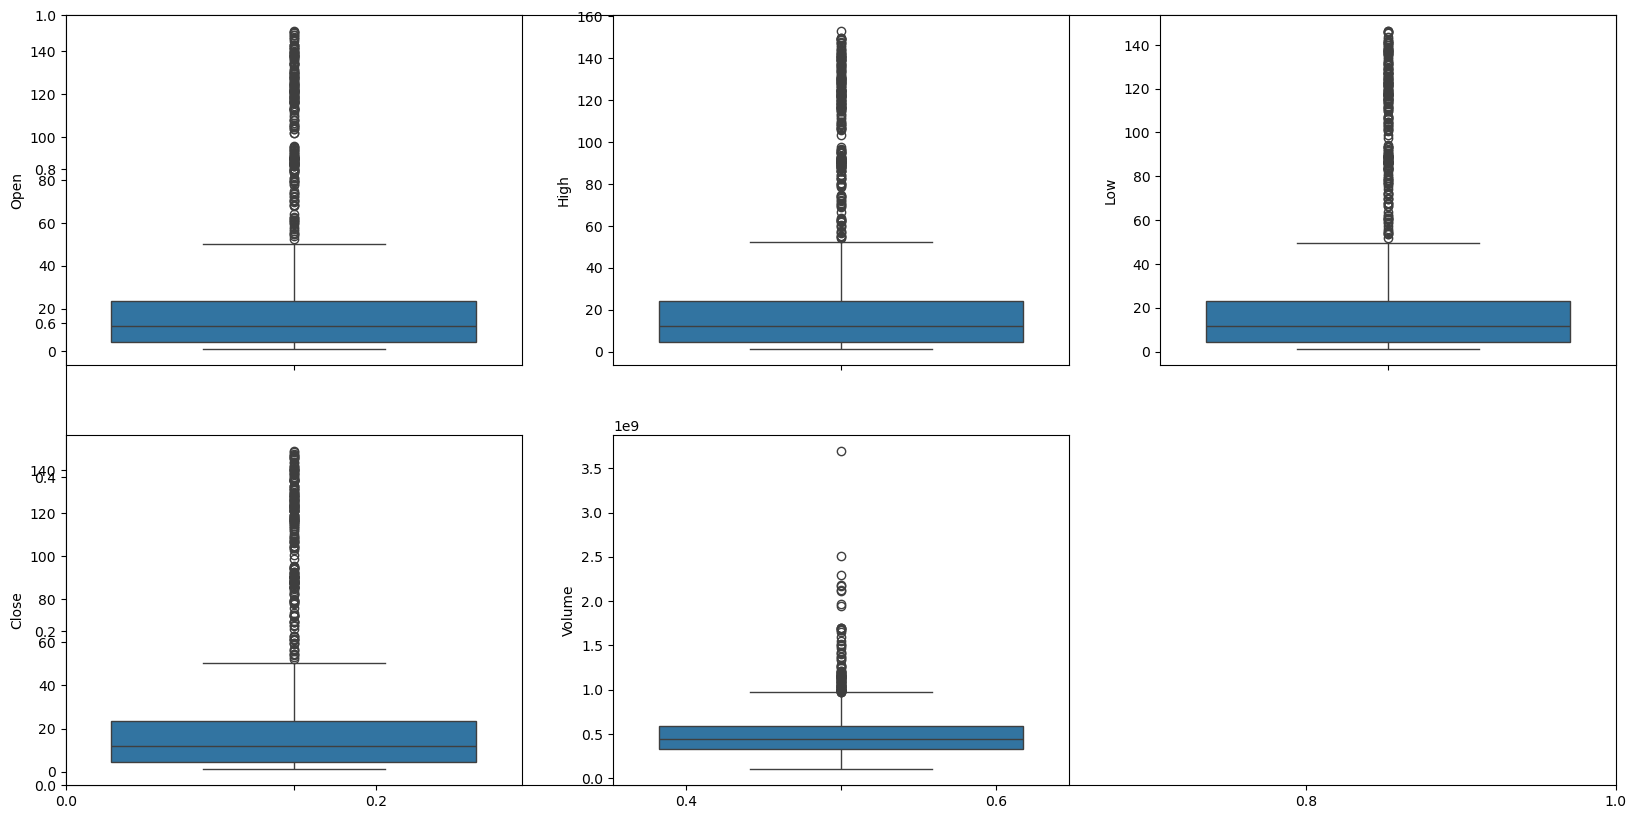

In [2160]:
plt.subplots(figsize=(20,10))
for i, j in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(data[j])
plt.show()

In [2161]:
data = df[df.columns[1:10]]
data = data.drop(['Adj Close'], axis=1)

data.head()

,Year,Month,Day,Close,High,Low,Open,Volume
0,2016,5,13,1.02450,1.02500,0.97500,0.97975,2110256000
1,2016,5,16,1.05475,1.07000,1.01350,1.01675,973032000
2,2016,5,17,1.05700,1.06450,1.03650,1.05000,628392000
3,2016,5,18,1.08400,1.09625,1.05000,1.05000,541072000
4,2016,5,19,1.08875,1.09650,1.07825,1.07975,398880000


In [2162]:
exch_month = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
data.replace({'Month':exch_month}, inplace=True)
data.head()

,Year,Month,Day,Close,High,Low,Open,Volume
0,2016,5,13,1.02450,1.02500,0.97500,0.97975,2110256000
1,2016,5,16,1.05475,1.07000,1.01350,1.01675,973032000
2,2016,5,17,1.05700,1.06450,1.03650,1.05000,628392000
3,2016,5,18,1.08400,1.09625,1.05000,1.05000,541072000
4,2016,5,19,1.08875,1.09650,1.07825,1.07975,398880000


In [2163]:
data['is_quarter_end'] = np.where(data['Month']%3 == 0, 1, 0)
data.head()

,Year,Month,Day,Close,High,Low,Open,Volume,is_quarter_end
0,2016,5,13,1.02450,1.02500,0.97500,0.97975,2110256000,0
1,2016,5,16,1.05475,1.07000,1.01350,1.01675,973032000,0
2,2016,5,17,1.05700,1.06450,1.03650,1.05000,628392000,0
3,2016,5,18,1.08400,1.09625,1.05000,1.05000,541072000,0
4,2016,5,19,1.08875,1.09650,1.07825,1.07975,398880000,0


In [2164]:
def plot_ft_mean(groupdata):
    plt.subplots(figsize=(20,10))
    
    for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
        plt.subplot(2,2,i+1)
        groupdata[col].plot.bar()
    plt.show()

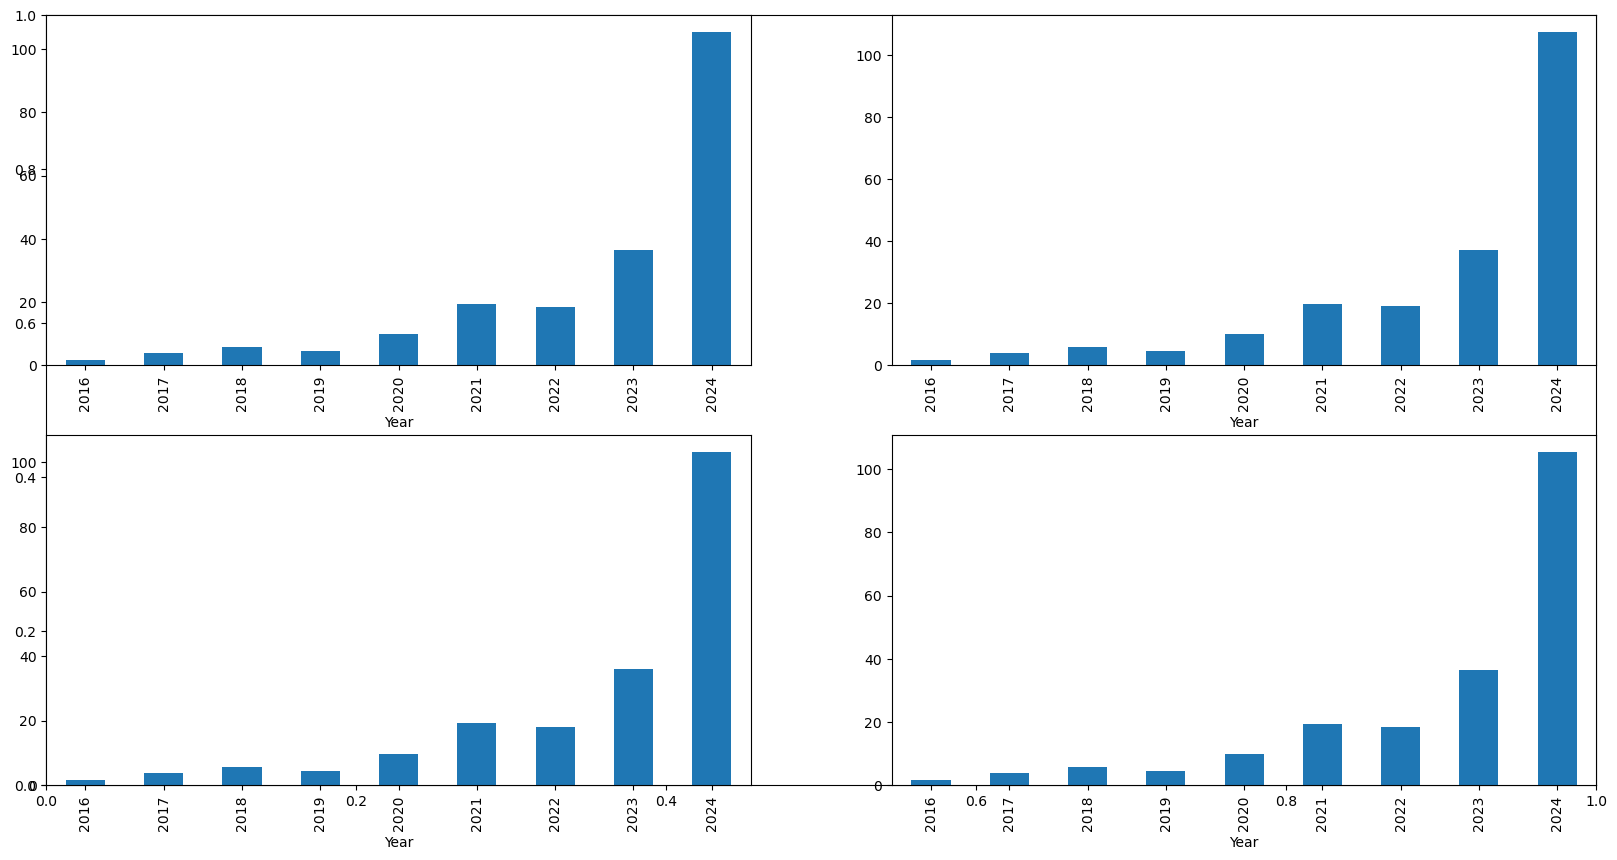

In [2165]:
data_grouped = data.groupby('Year').mean()
plot_ft_mean(data_grouped)

                    Close       High        Low       Open        Volume
is_quarter_end                                                          
0               23.670974  24.100513  23.198200  23.670613  4.873622e+08
1               21.676829  22.074986  21.245536  21.677502  5.032581e+08


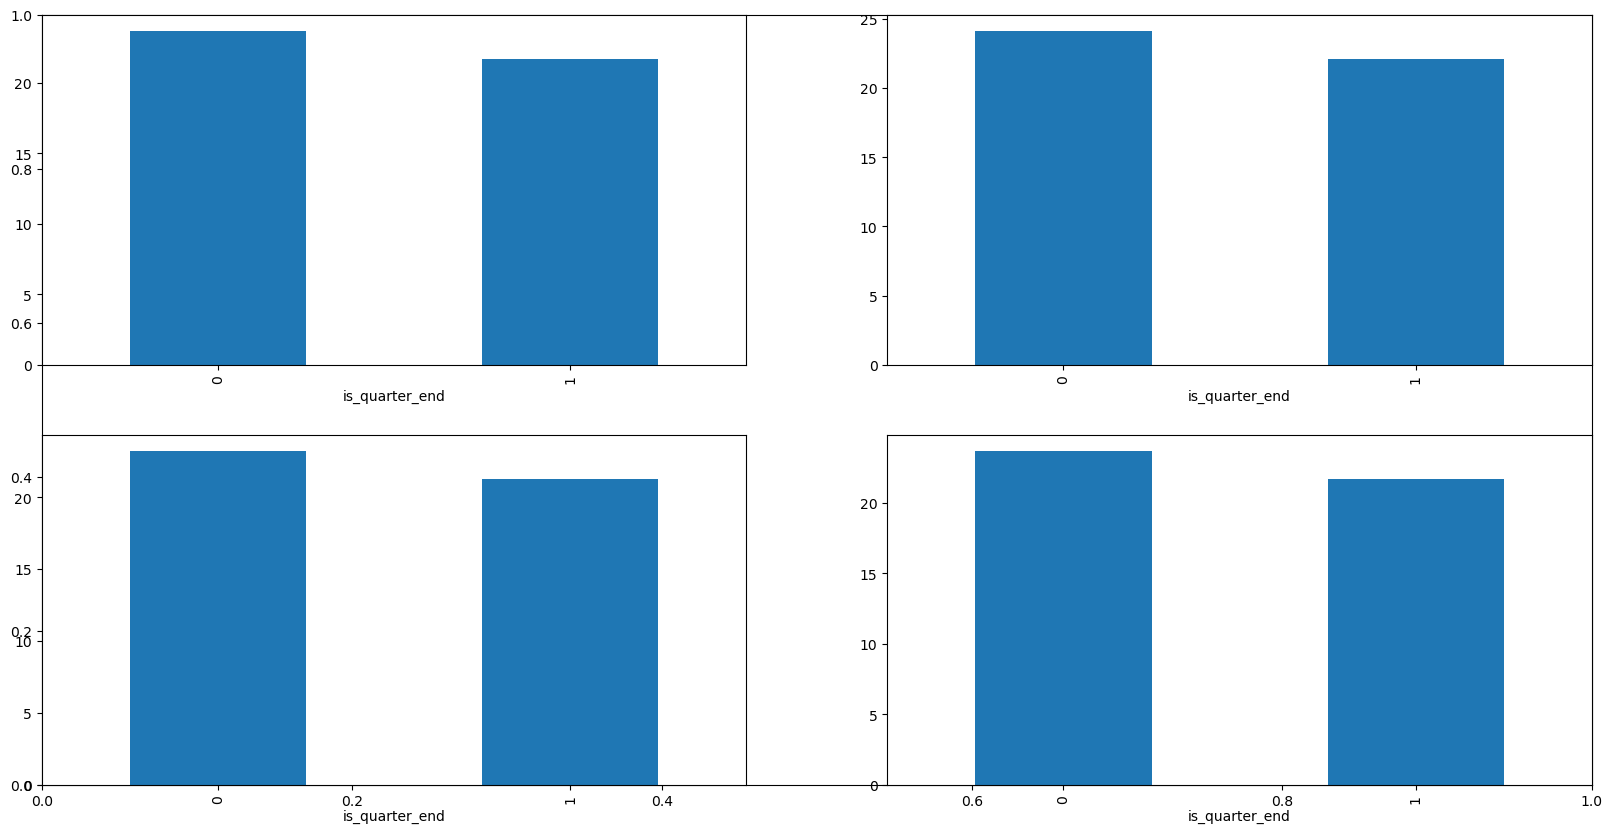

In [2166]:
quar_data = data.groupby('is_quarter_end').mean()
print(quar_data[quar_data.columns[3:8]])
plot_ft_mean(quar_data)

In [2167]:
data['open-close']= data['Open']-data['Close']
data['high-low']= data['High']-data['Low']  
data['target']= data['Close'].shift(-1)
data.replace(data['target'].loc[data.index[-1]], value=float(145.14), inplace=True)

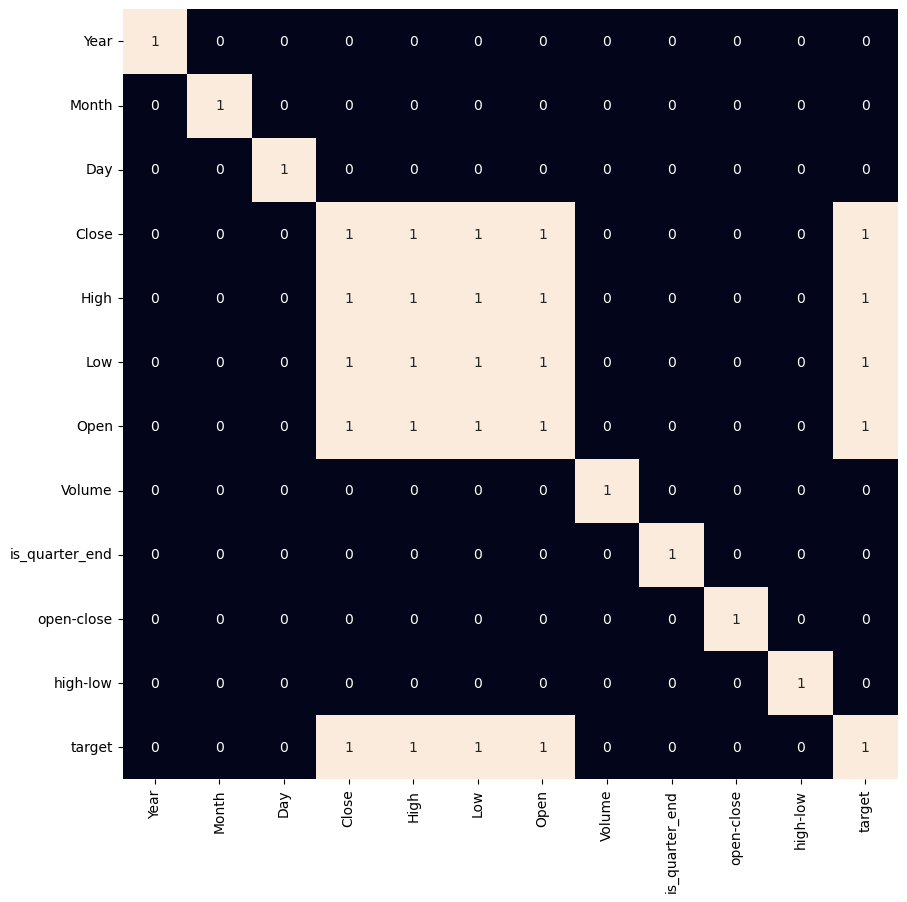

In [2168]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [2169]:
x = data[['Open','Close','High','Low','open-close', 'high-low', 'is_quarter_end']]
y = data['target']
x = np.array(x).reshape(-1,7)
y = np.array(y).reshape(-1,1)
x.shape, y.shape


((2154, 7), (2154, 1))

In [2170]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=500)
x_dev , x_test, y_dev, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=500)
x_train.shape, y_train.shape, x_dev.shape, y_dev.shape, x_test.shape, y_test.shape

((1723, 7), (1723, 1), (215, 7), (215, 1), (216, 7), (216, 1))

In [2171]:
x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_dev, y_dev = tf.convert_to_tensor(x_dev, dtype=tf.float32), tf.convert_to_tensor(y_dev, dtype=tf.float32) 
x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)


In [2172]:
class Normalize(tf.Module):
  def __init__(self, x):
    self.mean = tf.Variable(tf.math.reduce_mean(x, axis=0))
    self.std = tf.Variable(tf.math.reduce_std(x, axis=0))

  def norm(self, x):
    return (x - self.mean)/self.std

  def unnorm(self, x):
    return (x * self.std) + self.mean

norm_x = Normalize(x_train)
x_train_norm, x_dev_norm, x_test_norm = norm_x.norm(x_train),norm_x.norm(x_dev), norm_x.norm(x_test)


In [2173]:
model = tf.keras.Sequential([

	tf.keras.layers.Dense(units=256, activation='relu',
						input_shape=[x_train.shape[1]]),
	tf.keras.layers.Dense(units=256, activation='relu'),
	tf.keras.layers.Dense(units=1)
])
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_180 (Dense)               │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_182 (Dense)               │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,097 (266.00 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

In [2174]:
model.compile(optimizer='adam', loss='mae') 

In [2175]:
batch_size = 64
losses = model.fit(x_train_norm, y_train, validation_data=(x_dev_norm, y_dev),batch_size=batch_size, epochs=100, verbose=1)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.1319 - val_loss: 14.4810
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 14.7577 - val_loss: 5.8874
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 5.5751 - val_loss: 3.8394
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 3.6471 - val_loss: 2.3234
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 1.9237 - val_loss: 0.9381
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.8974 - val_loss: 0.7560
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.6532 - val_loss: 0.5949
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.6673 - val_loss: 0.7392
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.6762 - val_loss: 0.5847
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.5992 - val_loss: 0.5403
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.6163 - val_loss: 0.5446
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 

In [2176]:
model.evaluate(x_dev_norm[:3], y_dev[:3],batch_size=batch_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0288


0.028784433379769325

In [2177]:
model.predict(pd.DataFrame(x_dev_norm).iloc[0:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[7.827805 ],
       [1.3517587],
       [6.0017104]], dtype=float32)

In [2178]:
pd.DataFrame(y_dev).iloc[0:3]

,0
0,7.7800
1,1.3330
2,6.0215


<Axes: >

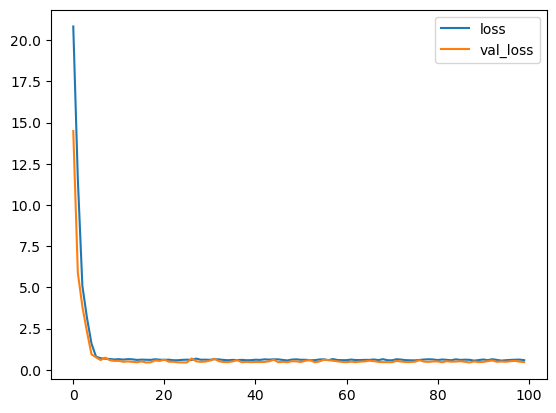

In [2179]:
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()

In [2180]:
def error(x,y):
    error = (np.sum(np.abs(model.predict(pd.DataFrame(x)) - pd.DataFrame(y)))*100)/(sum(np.array(y)))
    return error
print('Mean Absolute Percentage Error in train:', error(x_train_norm, y_train))
print('Mean Absolute Percentage Error in dev:', error(x_dev_norm, y_dev))
print('Mean Absolute Percentage Error in test:', error(x_test_norm, y_test))

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Absolute Percentage Error in train: 0    2.347501
dtype: float32
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Mean Absolute Percentage Error in dev: 0    2.377338
dtype: float32
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Mean Absolute Percentage Error in test: 0    2.568877
dtype: float32


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [2181]:
#To predict the stock price for the next day
x_norm = norm_x.norm(x)
next_day_input = x_norm[-1]
next_day_input = pd.DataFrame(next_day_input).T
print('Predicted stock price for the next day:', model.predict(next_day_input, batch_size=batch_size))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted stock price for the next day: [[142.729]]
